In [1]:
# data library
import numpy as np

# plotting library
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

# nn library
import torch
from torchview import draw_graph

# DAN custom library
import filters
from manage_exp import experiment, get_x0, get_ha0, print_scores
from filters import FcZeroLin, FcZero, FullyConnected

# display library
from IPython.display import display
from IPython.core.display import SVG, HTML


# support for automatic reloading
%load_ext autoreload
%autoreload 2

## 0. Graphics of analyzer, propagator, procoder

In [2]:
a = FcZeroLin(in_dim=6, out_dim=4, deep=1, activation_classname="nn.LeakyReLU")
b = FcZero(dim=4, deep=10, activation_classname="nn.LeakyReLU")
c = FullyConnected(layers=[4, 6], activation_classname="nn.LeakyReLU")

a_graph = draw_graph(a, input_size=[6], graph_name='a_model', graph_dir="LR", device='cpu', expand_nested=True)
b_graph = draw_graph(b, input_size=[4], graph_name='b_model', graph_dir="LR", device='cpu', expand_nested=True)
c_graph = draw_graph(c, input_size=[4], graph_name='c_model', graph_dir="LR", device='cpu', expand_nested=True)

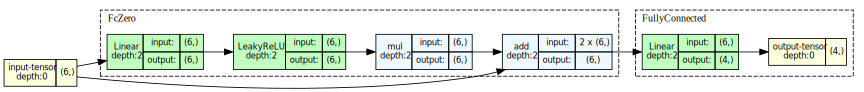

In [3]:
display(
    HTML("<h2>Model A</h2>"),
    SVG(a_graph.visual_graph._repr_image_svg_xml()),
)

In [4]:
display(
    HTML("<h2>Model B</h2>"),
    SVG(b_graph.visual_graph._repr_image_svg_xml()),
)

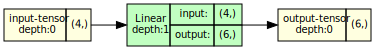

In [5]:
display(
    HTML("<h2>Model C</h2>"),
    SVG(c_graph.visual_graph._repr_image_svg_xml()),
)

## 1. Lin2D Experiment with $H = Id$ and deep = 10

In [2]:
from lin2d_exp_deep10 import get_params

### 1.1 Unpacking dictionnary and setting up the experiment

In [3]:
experiment_params = get_params()

tensor_type = experiment_params['tensor_type']
seed = experiment_params['seed']
net_classname = experiment_params['net_classname']
net_kwargs = experiment_params['net_kwargs']
sigma0 = experiment_params['sigma0']
prop_kwargs = experiment_params['prop_kwargs']
obs_kwargs = experiment_params['obs_kwargs']
train_kwargs = experiment_params['train_kwargs']
test_kwargs = experiment_params['test_kwargs']
optimizer_classname = experiment_params['optimizer_classname']
optimizer_kwargs = experiment_params['optimizer_kwargs']
scheduler_classname = experiment_params['scheduler_classname']
scheduler_kwargs = experiment_params['scheduler_kwargs']
directory = experiment_params['directory']
full_observable = experiment_params['full_observable']

print('deep = ', net_kwargs['a_kwargs']['loc_kwargs']['deep'])

deep =  10


In [4]:
nameexp = 'lin2d_exp_deep10/'

### 1.2 Running the experiment

Takes 2min30 to execute on a Macbook Pro M1, 16 Gb RAM:

In [5]:
experiment(
    tensor_type=tensor_type,
    seed=seed,
    net_classname=net_classname,
    net_kwargs=net_kwargs,
    sigma0=sigma0,
    prop_kwargs=prop_kwargs,
    obs_kwargs=obs_kwargs,
    train_kwargs=train_kwargs,
    test_kwargs=test_kwargs,
    optimizer_classname=optimizer_classname,
    optimizer_kwargs=optimizer_kwargs,
    scheduler_classname=scheduler_classname,
    scheduler_kwargs=scheduler_kwargs,
    directory=directory,
    nameexp=nameexp,
    full_observable=True
)

use gpu False
use tensor_type double
Pretraining the network
Pre-train c at t=0 

Empirical mean of $x_0$: 2.999919402706498
## INIT a0 mean tensor([3.0004, 2.9995], grad_fn=<SliceBackward0>)
## INIT a0 var tensor([0.0001, 0.0001], grad_fn=<SliceBackward0>)
## INIT a0 covar tensor([[1.1007e-04, 4.4020e-07],
        [4.4020e-07, 1.1572e-04]], grad_fn=<SliceBackward0>)
Training the network
Train full method with BPTT
Computing data in outside loop
Finished computing data in outside loop
Starting optimization
## Train Ite 0 ##
RMSE_b= 4.213420231912558
RMSE_a= 4.218806270580089
LOGPDF_b= 1294111.6920414018
LOGPDF_a= 1837002.9936303168
LOSS= 3131114.685671719
## Train Ite 1 ##
RMSE_b= 4.202624480538161
RMSE_a= 4.202350640147688
LOGPDF_b= 717432.904342749
LOGPDF_a= 910579.2620834878
LOSS= 1628012.1664262367
## Train Ite 10 ##
RMSE_b= 3.7104615137592214
RMSE_a= 3.7110092662803287
LOGPDF_b= 24674.9026403358
LOGPDF_a= 25394.116388185077
LOSS= 50069.01902852088
## Train Ite 20 ##
RMSE_b= 2.8001

### 1.3 Unpacking experiment

In [6]:
# load saved files
optimizer_lin2d = torch.load(f'{directory + nameexp}optimizer.pt')
scores_lin2d = torch.load(f'{directory + nameexp}scores.pt')
test_scores_lin2d = torch.load(f'{directory + nameexp}test_scores.pt')
x_lin2d = torch.load(f'{directory + nameexp}x.pt')
y_lin2d = torch.load(f'{directory + nameexp}y.pt')
list_qa_lin2d = torch.load(f'{directory + nameexp}list_qa.pt')

x_test_lin2d = torch.load(f'{directory + nameexp}x_test.pt')
y_test_lin2d = torch.load(f'{directory + nameexp}y_test.pt')
list_qa_test_lin2d = torch.load(f'{directory + nameexp}list_qa_test.pt')


mus_lin2d = [mu.mean for mu in list_qa_lin2d]
mus_test_lin2d = [mu.mean for mu in list_qa_test_lin2d]

# load saved files
net = torch.load(f'{directory}{nameexp}net.pt')

print_scores(net.scores)

RMSE_b= 0.029877040593627224
RMSE_a= 0.027554847798837878
LOGPDF_b= -3.8171902115402307
LOGPDF_a= -3.975076236406162
LOSS= -7.792266447946393


### 1.4 Plotting

#### 1.4.1 Trajectory for a train sample id

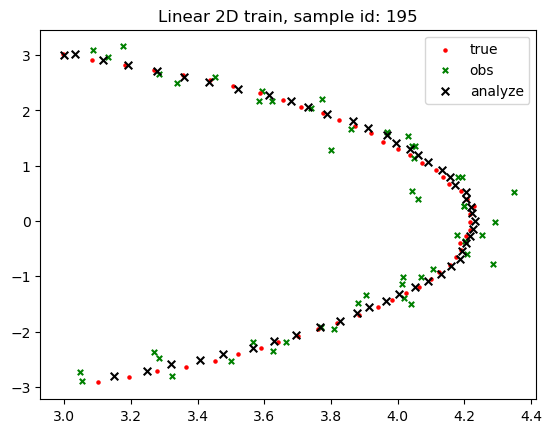

In [7]:
# np.random.seed(33)
id = np.random.randint(0, train_kwargs['b_size'])

plt.figure()

for t in range(train_kwargs['T']):
    xt_x, xt_y = x_lin2d[t][id, 0].item(), x_lin2d[t][id, 1].item()
    yt_x, yt_y = y_lin2d[t][id, 0].item(), y_lin2d[t][id, 1].item()
    mu_x, mu_y = mus_lin2d[t][id, 0].item(), mus_lin2d[t][id, 1].item()

    plt.scatter(xt_x, xt_y, color='red', s=5)
    plt.scatter(yt_x, yt_y, color='green', s=15, marker='x')
    plt.scatter(mu_x, mu_y, color='k', s=30, marker='x')

plt.title(f'Linear 2D train, sample id: {id}')
plt.legend(['true', 'obs', 'analyze'])

plt.savefig(f'images/lin2d_train_{id}.png')

plt.show()

#### 1.4.2 Trajectory for train mean sample

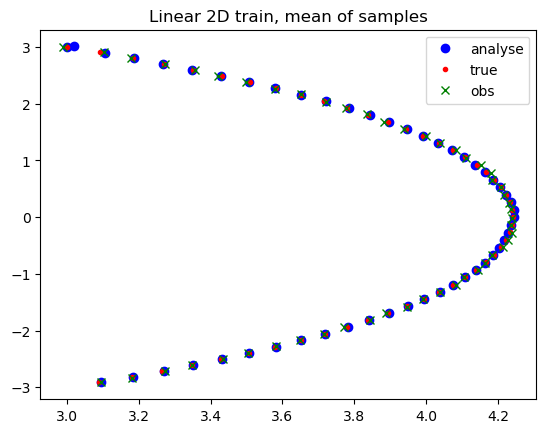

In [8]:
x_simu = torch.mean(torch.stack(x_lin2d),axis=1).cpu().detach().numpy()
y_simu = torch.mean(torch.stack(y_lin2d),axis=1).cpu().detach().numpy()
ana = torch.mean(torch.stack(mus_lin2d),axis=1).cpu().detach().numpy()

plt.plot(ana[:,0],ana[:,1],'o',color='blue')
plt.plot(x_simu[:,0],x_simu[:,1],'.',color='red',)
plt.plot(y_simu[:,0], y_simu[:,1],'x ', color='green')

plt.title('Linear 2D train, mean of samples')
plt.legend(['analyse', 'true', 'obs'])

plt.savefig(f'images/lin2d_train_mean.png')

plt.show()

#### 1.4.3 Trajectory for test sample id

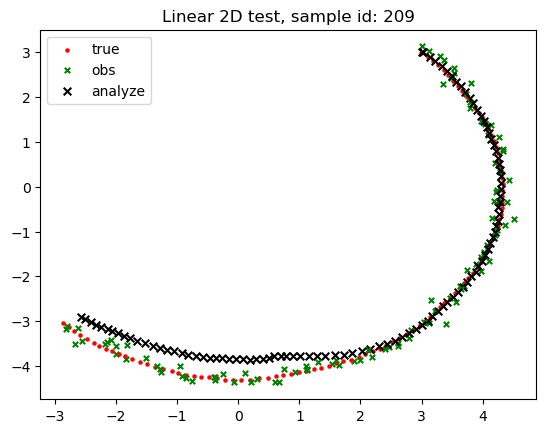

In [9]:
# np.random.seed(33)
id = np.random.randint(0, train_kwargs['b_size'])

plt.figure()

for t in range(test_kwargs['T']):
    xt_x, xt_y = x_test_lin2d[t][id, 0].item(), x_test_lin2d[t][id, 1].item()
    yt_x, yt_y = y_test_lin2d[t][id, 0].item(), y_test_lin2d[t][id, 1].item()
    mu_x, mu_y = mus_test_lin2d[t][id, 0].item(), mus_test_lin2d[t][id, 1].item()

    plt.scatter(xt_x, xt_y, color='red', s=5)
    plt.scatter(yt_x, yt_y, color='green', s=15, marker='x')
    plt.scatter(mu_x, mu_y, color='k', s=30, marker='x')

plt.title(f'Linear 2D test, sample id: {id}')
plt.legend(['true', 'obs', 'analyze'])

plt.savefig(f'images/lin2d_test_{id}.png')

plt.show()

#### 1.4.4 Trajectory for test mean sample

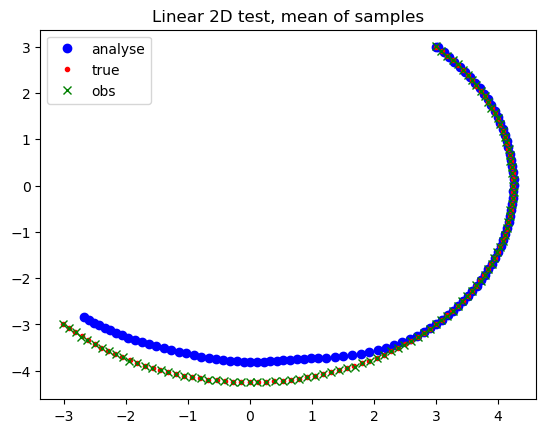

In [10]:
x_simu_test = torch.mean(torch.stack(x_test_lin2d),axis=1).cpu().detach().numpy()
y_simu_test = torch.mean(torch.stack(y_test_lin2d),axis=1).cpu().detach().numpy()
ana_test = torch.mean(torch.stack(mus_test_lin2d),axis=1).cpu().detach().numpy()

plt.plot(ana_test[:,0],ana_test[:,1],'o',color='blue')
plt.plot(x_simu_test[:,0],x_simu_test[:,1],'.',color='red',)
plt.plot(y_simu_test[:,0], y_simu_test[:,1],'x ', color='green')

plt.title('Linear 2D test, mean of samples')
plt.legend(['analyse', 'true', 'obs'])

plt.savefig(f'images/lin2d_test_mean.png')

plt.show()

#### 1.4.5 Error

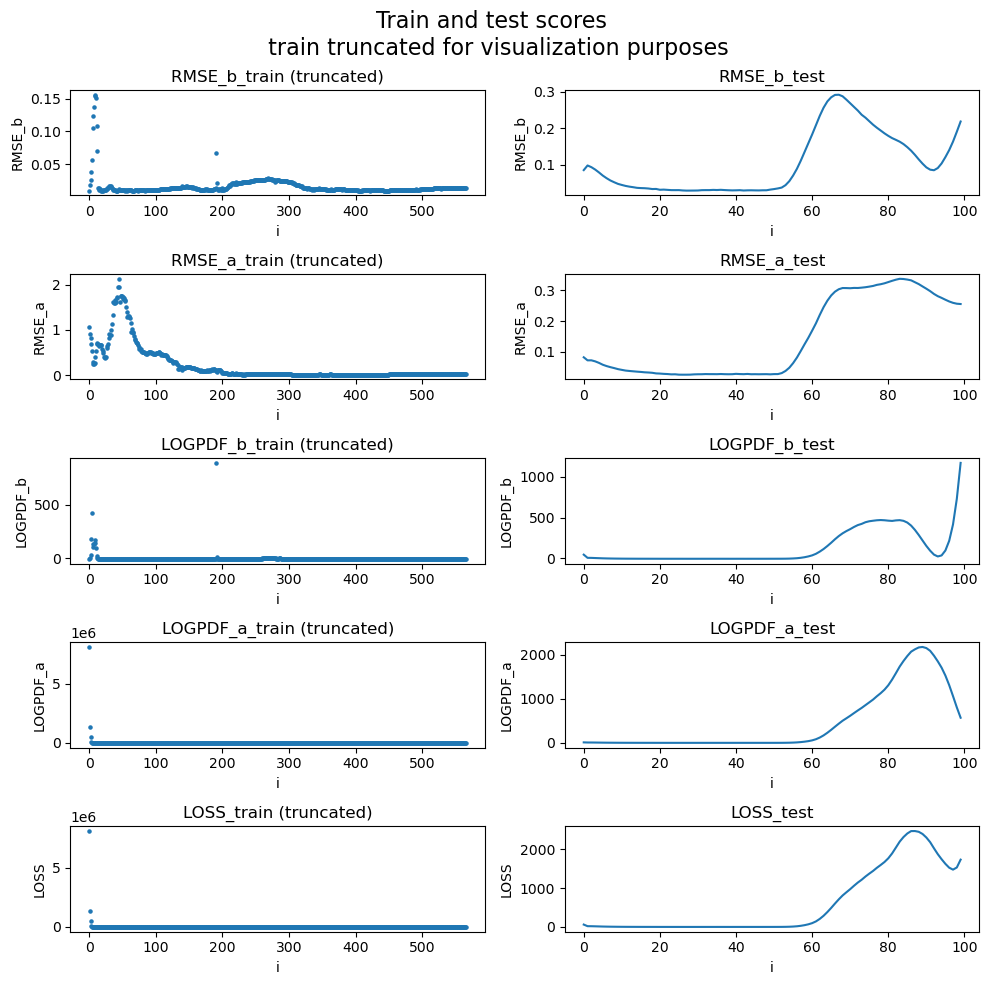

In [15]:
fig, axs = plt.subplots(len(scores_lin2d.keys()), 2, figsize=(10, 10))

i = 0
for key_train, key_test in zip(scores_lin2d.keys(), test_scores_lin2d.keys()):
    data_train = scores_lin2d[key_train][::100]
    data_test = test_scores_lin2d[key_test]

    axs[i, 0].set_title(f'{key_train}_train (truncated)')
    axs[i, 0].scatter(np.arange(len(data_train)), data_train, s=5)
    axs[i, 0].set_xlabel('i')
    axs[i, 0].set_ylabel(key_train)

    axs[i, 1].set_title(f'{key_test}_test')
    axs[i, 1].plot(data_test)
    axs[i, 1].set_xlabel('i')
    axs[i, 1].set_ylabel(key_test)

    # if key_train in ['LOGPDF_a', 'LOGPDF_b', 'LOSS']:
    #     axs[i, 0].set_yscale('log')
    #     axs[i, 0].set_ylim(1e-5, 0)
        # axs[i, 1].set_yscale('log')
    
    i += 1

plt.suptitle('Train and test scores \n train truncated for visualization purposes', fontsize=16)
plt.tight_layout()

plt.savefig(f'images/lin2d_error.png')

plt.show()

### 1.5 Other values of deep

#### 1.5.1 Deep = 2

In [16]:
from lin2d_exp_deep2 import get_params

experiment_params = get_params()

tensor_type = experiment_params['tensor_type']
seed = experiment_params['seed']
net_classname = experiment_params['net_classname']
net_kwargs = experiment_params['net_kwargs']
sigma0 = experiment_params['sigma0']
prop_kwargs = experiment_params['prop_kwargs']
obs_kwargs = experiment_params['obs_kwargs']
train_kwargs = experiment_params['train_kwargs']
test_kwargs = experiment_params['test_kwargs']
optimizer_classname = experiment_params['optimizer_classname']
optimizer_kwargs = experiment_params['optimizer_kwargs']
scheduler_classname = experiment_params['scheduler_classname']
scheduler_kwargs = experiment_params['scheduler_kwargs']
directory = experiment_params['directory']
full_observable = experiment_params['full_observable']

print('deep = ', net_kwargs['a_kwargs']['loc_kwargs']['deep'])

nameexp = 'lin2d_exp_deep2/'

experiment(
    tensor_type=tensor_type,
    seed=seed,
    net_classname=net_classname,
    net_kwargs=net_kwargs,
    sigma0=sigma0,
    prop_kwargs=prop_kwargs,
    obs_kwargs=obs_kwargs,
    train_kwargs=train_kwargs,
    test_kwargs=test_kwargs,
    optimizer_classname=optimizer_classname,
    optimizer_kwargs=optimizer_kwargs,
    scheduler_classname=scheduler_classname,
    scheduler_kwargs=scheduler_kwargs,
    directory=directory,
    nameexp=nameexp,
    full_observable=True,
    verbose=True
)

# load saved files
net = torch.load(f'{directory}{nameexp}net.pt')

print_scores(net.scores)

deep =  2
use gpu False
use tensor_type double
Pretraining the network
Pre-train c at t=0 

Empirical mean of $x_0$: 2.999919402706498
## INIT a0 mean tensor([3.0004, 2.9995], grad_fn=<SliceBackward0>)
## INIT a0 var tensor([0.0001, 0.0001], grad_fn=<SliceBackward0>)
## INIT a0 covar tensor([[1.1007e-04, 4.4020e-07],
        [4.4020e-07, 1.1572e-04]], grad_fn=<SliceBackward0>)
Training the network
Train full method with BPTT
Computing data in outside loop
Finished computing data in outside loop
Starting optimization
## Train Ite 0 ##
RMSE_b= 4.480054360425948
RMSE_a= 4.484527540854078
LOGPDF_b= 152369242.2641634
LOGPDF_a= 121329265.10928419
LOSS= 273698507.3734476
## Train Ite 1 ##
RMSE_b= 4.445287240721802
RMSE_a= 4.45877219498516
LOGPDF_b= 201983.28990058578
LOGPDF_a= 126827.99374359033
LOSS= 328811.2836441761
## Train Ite 10 ##
RMSE_b= 4.449272100236316
RMSE_a= 4.462888191844744
LOGPDF_b= 186942.90400343717
LOGPDF_a= 227343.58105020627
LOSS= 414286.48505364347
## Train Ite 20 ##
RMS

#### 1.5.2 Deep = 20

In [17]:
from lin2d_exp_deep20 import get_params

experiment_params = get_params()

tensor_type = experiment_params['tensor_type']
seed = experiment_params['seed']
net_classname = experiment_params['net_classname']
net_kwargs = experiment_params['net_kwargs']
sigma0 = experiment_params['sigma0']
prop_kwargs = experiment_params['prop_kwargs']
obs_kwargs = experiment_params['obs_kwargs']
train_kwargs = experiment_params['train_kwargs']
test_kwargs = experiment_params['test_kwargs']
optimizer_classname = experiment_params['optimizer_classname']
optimizer_kwargs = experiment_params['optimizer_kwargs']
scheduler_classname = experiment_params['scheduler_classname']
scheduler_kwargs = experiment_params['scheduler_kwargs']
directory = experiment_params['directory']
full_observable = experiment_params['full_observable']

print('deep = ', net_kwargs['a_kwargs']['loc_kwargs']['deep'])

nameexp = 'lin2d_exp_deep20/'

experiment(
    tensor_type=tensor_type,
    seed=seed,
    net_classname=net_classname,
    net_kwargs=net_kwargs,
    sigma0=sigma0,
    prop_kwargs=prop_kwargs,
    obs_kwargs=obs_kwargs,
    train_kwargs=train_kwargs,
    test_kwargs=test_kwargs,
    optimizer_classname=optimizer_classname,
    optimizer_kwargs=optimizer_kwargs,
    scheduler_classname=scheduler_classname,
    scheduler_kwargs=scheduler_kwargs,
    directory=directory,
    nameexp=nameexp,
    full_observable=True,
    verbose=True
)

# load saved files
net = torch.load(f'{directory}{nameexp}net.pt')

print_scores(net.scores)

deep =  20
use gpu False
use tensor_type double
Pretraining the network
Pre-train c at t=0 

Empirical mean of $x_0$: 2.999919402706498
## INIT a0 mean tensor([3.0004, 2.9995], grad_fn=<SliceBackward0>)
## INIT a0 var tensor([0.0001, 0.0001], grad_fn=<SliceBackward0>)
## INIT a0 covar tensor([[1.1007e-04, 4.4020e-07],
        [4.4020e-07, 1.1572e-04]], grad_fn=<SliceBackward0>)
Training the network
Train full method with BPTT
Computing data in outside loop
Finished computing data in outside loop
Starting optimization
## Train Ite 0 ##
RMSE_b= 4.191848817887118
RMSE_a= 4.1904596285870905
LOGPDF_b= 81921.14307084339
LOGPDF_a= 107836.60724871418
LOSS= 189757.75031955756
## Train Ite 1 ##
RMSE_b= 4.238456148799288
RMSE_a= 4.23096369206414
LOGPDF_b= 4076154.2234946047
LOGPDF_a= 3313057.264947119
LOSS= 7389211.488441724
## Train Ite 10 ##
RMSE_b= 4.294868881474764
RMSE_a= 4.2960141530805185
LOGPDF_b= 7512.144407903926
LOGPDF_a= 6712.368395883592
LOSS= 14224.512803787518
## Train Ite 20 ##
RM

In [18]:
# load saved files
net = torch.load(f'{directory}{nameexp}net.pt')

print_scores(net.scores)

RMSE_b= 0.03351479910467134
RMSE_a= 0.03135201784008465
LOGPDF_b= -3.660647244815327
LOGPDF_a= -3.86978663035596
LOSS= -7.530433875171287


## 2. Lorenz Experiment with $H = Id$

In [2]:
from lorenz_exp import get_params

### 2.1 Unpacking dictionnary and setting up the experiment

In [3]:
experiment_params = get_params()

tensor_type = experiment_params['tensor_type']
seed = experiment_params['seed']
net_classname = experiment_params['net_classname']
net_kwargs = experiment_params['net_kwargs']
sigma0 = experiment_params['sigma0']
prop_kwargs = experiment_params['prop_kwargs']
obs_kwargs = experiment_params['obs_kwargs']
train_kwargs = experiment_params['train_kwargs']
test_kwargs = experiment_params['test_kwargs']
optimizer_classname = experiment_params['optimizer_classname']
optimizer_kwargs = experiment_params['optimizer_kwargs']
scheduler_classname = experiment_params['scheduler_classname']
scheduler_kwargs = experiment_params['scheduler_kwargs']
directory = experiment_params['directory']
full_observable = experiment_params['full_observable']

In [4]:
nameexp = 'lorenz_exp/'

### 2.2 Running the experiment

It takes around 30min to execute on a Macbook Pro M1, 16 Gb RAM:

In [5]:
experiment(
    tensor_type=tensor_type,
    seed=seed,
    net_classname=net_classname,
    net_kwargs=net_kwargs,
    sigma0=sigma0,
    prop_kwargs=prop_kwargs,
    obs_kwargs=obs_kwargs,
    train_kwargs=train_kwargs,
    test_kwargs=test_kwargs,
    optimizer_classname=optimizer_classname,
    optimizer_kwargs=optimizer_kwargs,
    scheduler_classname=scheduler_classname,
    scheduler_kwargs=scheduler_kwargs,
    directory=directory,
    nameexp=nameexp,
    full_observable=full_observable,
    verbose=False
)

use gpu False
use tensor_type float
Training the network
 optimizer_classname torch.optim.Adam
 scheduler_classname torch.optim.lr_scheduler.ExponentialLR


Time  9999: 100%|██████████| 9999/9999 [31:54<00:00,  5.22it/s, observed=true, train_loss=70.66, lr=0.000100] 


### 2.3 Unpacking the experiment

In [6]:
# load saved files
optimizer_lorentz = torch.load(f'{directory + nameexp}optimizer.pt')
scores_lorentz = torch.load(f'{directory + nameexp}scores.pt')
test_scores_lorentz = torch.load(f'{directory + nameexp}test_scores.pt')
x_lorentz = torch.load(f'{directory + nameexp}x.pt')
y_lorentz= torch.load(f'{directory + nameexp}y.pt')

x_test_lorentz = torch.load(f'{directory + nameexp}x_test.pt')
y_test_lorentz = torch.load(f'{directory + nameexp}y_test.pt')
list_qa_test_lorentz = torch.load(f'{directory + nameexp}list_qa_test.pt')

mus_test_lorentz = [mu.mean for mu in list_qa_test_lorentz]

# load saved files
net = torch.load(f'{directory}{nameexp}net.pt')

print_scores(net.scores)

RMSE_b= 0.6934317350387573
RMSE_a= 0.5463374853134155
LOGPDF_b= 37.98496627807617
LOGPDF_a= 32.67350769042969
LOSS= 70.65847778320312


### 2.4 Plotting

#### 2.4.1 Lorentz for a train sample id

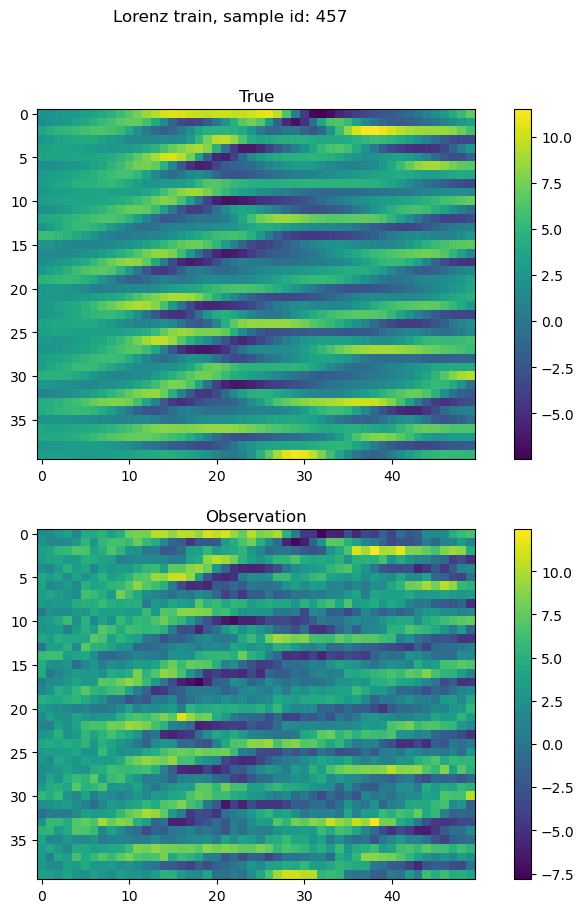

In [7]:
id = np.random.randint(0, train_kwargs['b_size'])

fig, axs = plt.subplots(2, figsize=(10, 10))

im = axs[0].imshow(torch.stack(x_lorentz)[:50, id, :].T)
axs[0].set_title('True')

im2 = axs[1].imshow(torch.stack(y_lorentz)[:50, id, :].T)
axs[1].set_title('Observation')

plt.colorbar(im)
plt.colorbar(im2)

plt.suptitle(f'Lorenz train, sample id: {id}')

plt.savefig(f'images/lorentz_train_{id}.png')

plt.show()

#### 2.4.2 Lorentz for a train mean sample

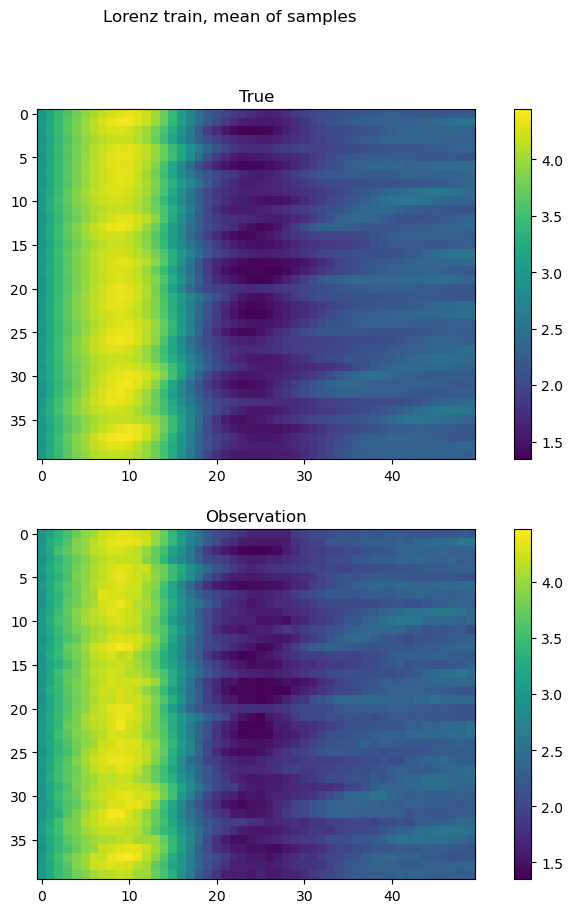

In [8]:
x_mean = torch.mean(torch.stack(x_lorentz), axis=1).cpu().detach().numpy()
y_mean = torch.mean(torch.stack(y_lorentz), axis=1).cpu().detach().numpy()

fig, axs = plt.subplots(2, figsize=(10, 10))

im = axs[0].imshow(x_mean[:50, :].T)
axs[0].set_title('True')

im2 = axs[1].imshow(y_mean[:50, :].T)
axs[1].set_title('Observation')

plt.colorbar(im)
plt.colorbar(im2)

plt.suptitle(f'Lorenz train, mean of samples')

plt.savefig(f'images/lorentz_train_mean.png')

plt.show()

#### 2.4.3 Lorenz for a test sample id

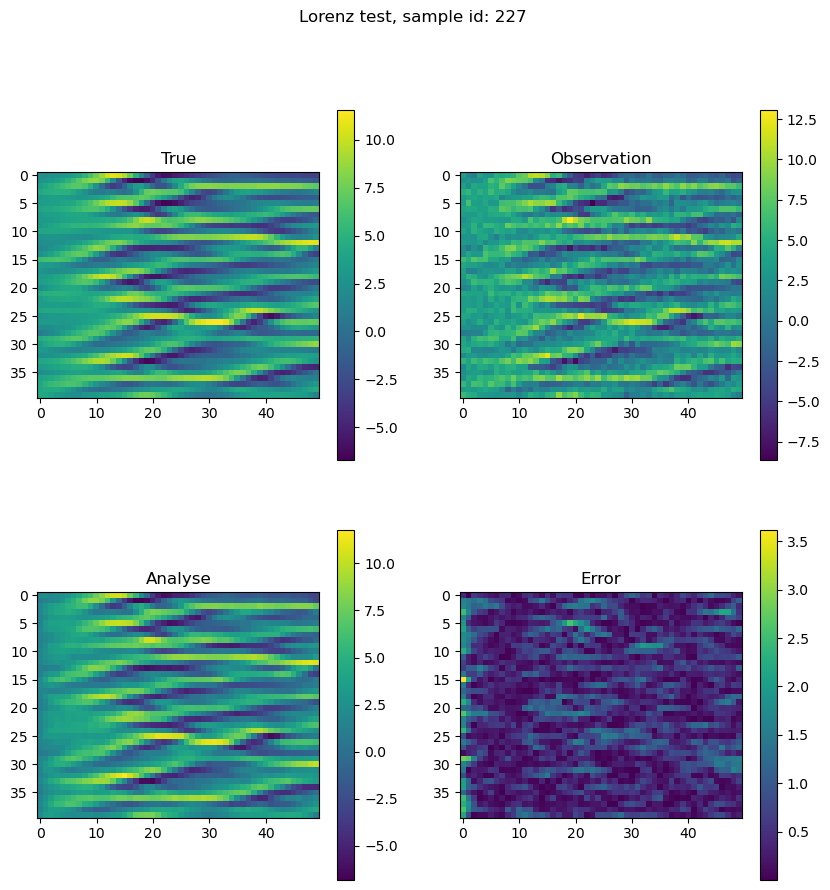

In [9]:
id = np.random.randint(0, train_kwargs['b_size'])

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

im = axs[0, 0].imshow(torch.stack(x_test_lorentz)[:50, id, :].T)
axs[0, 0].set_title('True')

im2 = axs[0, 1].imshow(torch.stack(y_test_lorentz)[:50, id, :].T)
axs[0, 1].set_title('Observation')

im3 = axs[1, 0].imshow(torch.stack(mus_test_lorentz)[:50, id, :].T)
axs[1, 0].set_title('Analyse')

im4 = axs[1, 1].imshow(torch.abs(torch.stack(x_test_lorentz) - torch.stack(mus_test_lorentz))[:50, id, :].T)
axs[1, 1].set_title('Error')
# im = ax.imshow(torch.stack(x_test_lorentz)[:50, id, :].T)
# divider = make_axes_locatable(ax)

plt.colorbar(im)
plt.colorbar(im2)
plt.colorbar(im3)
plt.colorbar(im4)

plt.suptitle(f'Lorenz test, sample id: {id}')

plt.savefig(f'images/lorentz_test_{id}.png')

plt.show()

#### 2.4.4 Lorenz for test mean sample

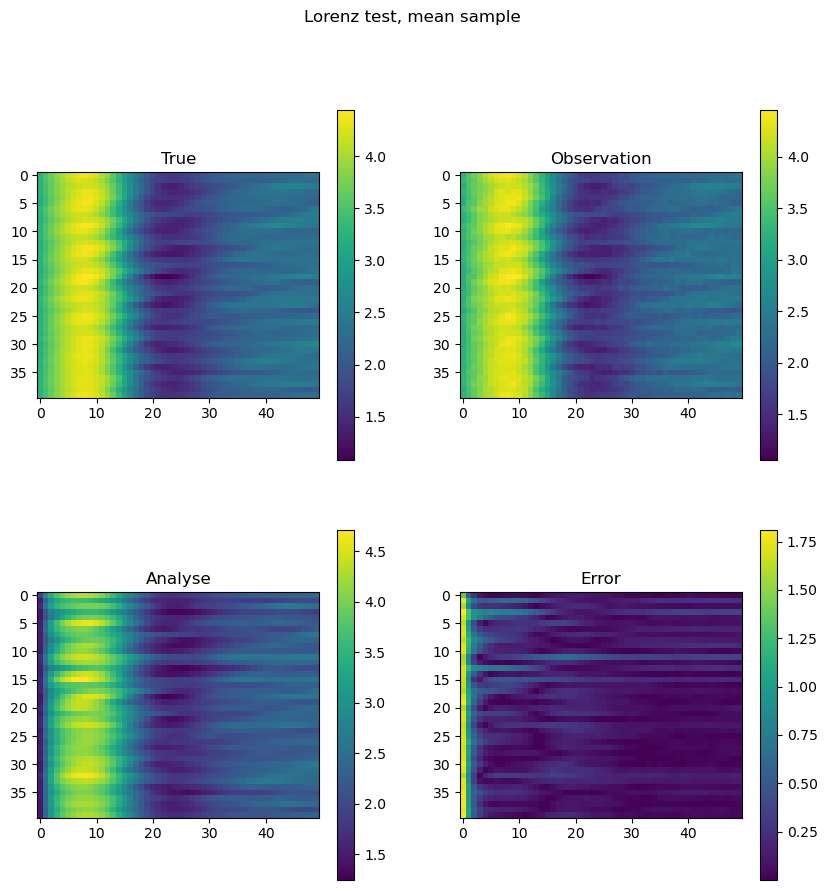

In [10]:
x_mean = torch.mean(torch.stack(x_test_lorentz), axis=1).detach().numpy()
y_mean = torch.mean(torch.stack(y_test_lorentz), axis=1).detach().numpy()
mus_mean = torch.mean(torch.stack(mus_test_lorentz), axis=1).detach().numpy()

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

im = axs[0, 0].imshow(x_mean[:50, :].T)
axs[0, 0].set_title('True')

im2 = axs[0, 1].imshow(y_mean[:50, :].T)
axs[0, 1].set_title('Observation')

im3 = axs[1, 0].imshow(mus_mean[:50, :].T)
axs[1, 0].set_title('Analyse')

im4 = axs[1, 1].imshow(np.abs(x_mean - mus_mean)[:50, :].T)
axs[1, 1].set_title('Error')
# im = ax.imshow(torch.stack(x_test_lorentz)[:50, id, :].T)
# divider = make_axes_locatable(ax)

plt.colorbar(im)
plt.colorbar(im2)
plt.colorbar(im3)
plt.colorbar(im4)

plt.suptitle(f'Lorenz test, mean sample')

plt.savefig(f'images/lorentz_test_mean.png')

plt.show()

#### 2.4.5 Error

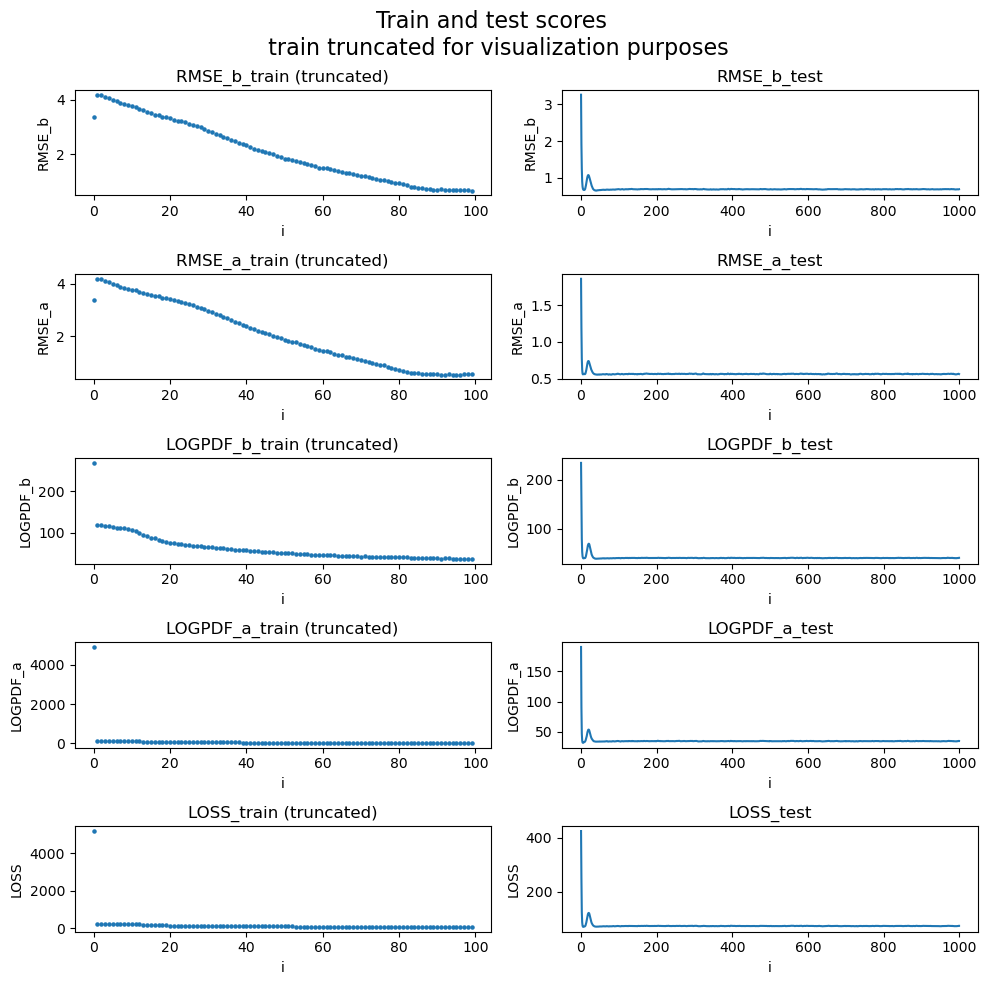

In [11]:
fig, axs = plt.subplots(len(scores_lorentz.keys()), 2, figsize=(10, 10))

i = 0
for key_train, key_test in zip(scores_lorentz.keys(), test_scores_lorentz.keys()):
    data_train = scores_lorentz[key_train][::100]
    data_test = test_scores_lorentz[key_test]

    axs[i, 0].set_title(f'{key_train}_train (truncated)')
    axs[i, 0].scatter(np.arange(len(data_train)), data_train, s=5)
    axs[i, 0].set_xlabel('i')
    axs[i, 0].set_ylabel(key_train)

    axs[i, 1].set_title(f'{key_test}_test')
    axs[i, 1].plot(data_test)
    axs[i, 1].set_xlabel('i')
    axs[i, 1].set_ylabel(key_test)

    # if key_train in ['LOGPDF_a', 'LOGPDF_b', 'LOSS']:
    #     axs[i, 0].set_yscale('log')
        # axs[i, 1].set_yscale('log')
    
    i += 1

plt.suptitle('Train and test scores \n train truncated for visualization purposes', fontsize=16)
plt.tight_layout()

plt.savefig(f'images/lorentz_error.png')

plt.show()

## 3. Lind2D Experiment with $H != Id$

In [19]:
from lin2d_H_exp import get_params

### 3.1 Unpacking dictionnary and setting up the experiment

In [20]:
experiment_params = get_params()

tensor_type = experiment_params['tensor_type']
seed = experiment_params['seed']
net_classname = experiment_params['net_classname']
net_kwargs = experiment_params['net_kwargs']
sigma0 = experiment_params['sigma0']
prop_kwargs = experiment_params['prop_kwargs']
obs_kwargs = experiment_params['obs_kwargs']
train_kwargs = experiment_params['train_kwargs']
test_kwargs = experiment_params['test_kwargs']
optimizer_classname = experiment_params['optimizer_classname']
optimizer_kwargs = experiment_params['optimizer_kwargs']
scheduler_classname = experiment_params['scheduler_classname']
scheduler_kwargs = experiment_params['scheduler_kwargs']
directory = experiment_params['directory']
full_observable = experiment_params['full_observable']

In [21]:
nameexp = 'lin2d_H_exp/'

### 3.2 Running the experiment

In [22]:
experiment(
    tensor_type=tensor_type,
    seed=seed,
    net_classname=net_classname,
    net_kwargs=net_kwargs,
    sigma0=sigma0,
    prop_kwargs=prop_kwargs,
    obs_kwargs=obs_kwargs,
    train_kwargs=train_kwargs,
    test_kwargs=test_kwargs,
    optimizer_classname=optimizer_classname,
    optimizer_kwargs=optimizer_kwargs,
    scheduler_classname=scheduler_classname,
    scheduler_kwargs=scheduler_kwargs,
    directory=directory,
    nameexp=nameexp,
    full_observable=full_observable,
    verbose=False
)

use gpu False
use tensor_type double
Pretraining the network
Pre-train c at t=0 

Empirical mean of $x_0$: 2.999919402706498
Training the network
Train full method with BPTT
Computing data in outside loop
Finished computing data in outside loop
Starting optimization
Finished optimization
Computing predictions


### 3.3 Unpacking experiment

In [23]:
# load saved files
optimizer_lin2d_H_mod = torch.load(f'{directory + nameexp}optimizer.pt')
scores_lin2d_H_mod = torch.load(f'{directory + nameexp}scores.pt')
test_scores_lin2d_H_mod = torch.load(f'{directory + nameexp}test_scores.pt')
x_lin2d_H_mod = torch.load(f'{directory + nameexp}x.pt')
y_lin2d_H_mod = torch.load(f'{directory + nameexp}y.pt')
list_qa_lin2d_H_mod = torch.load(f'{directory + nameexp}list_qa.pt')

x_test_lin2d_H_mod = torch.load(f'{directory + nameexp}x_test.pt')
y_test_lin2d_H_mod = torch.load(f'{directory + nameexp}y_test.pt')
list_qa_test_lin2d_H_mod = torch.load(f'{directory + nameexp}list_qa_test.pt')


mus_lin2d_H_mod = [mu.mean for mu in list_qa_lin2d_H_mod]
mus_test_lin2d_H_mod = [mu.mean for mu in list_qa_test_lin2d_H_mod]

# load saved files
net = torch.load(f'{directory}{nameexp}net.pt')

print_scores(net.scores)

RMSE_b= 0.0365248121814986
RMSE_a= 0.03943136426139901
LOGPDF_b= -3.548457463359463
LOGPDF_a= -3.42173125634573
LOSS= -6.9701887197051935


### 3.4 Plotting

#### 3.4.1 Trajectoring for a train sample id

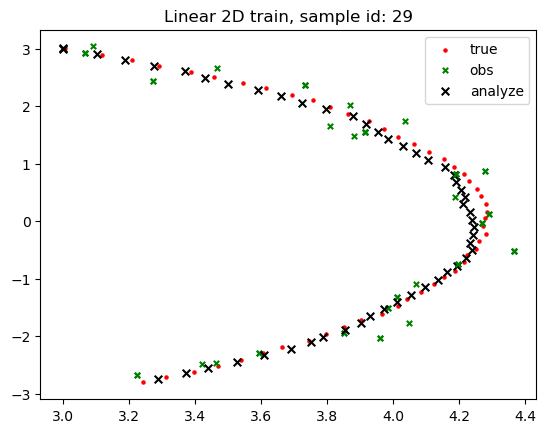

In [24]:
# np.random.seed(33)
id = np.random.randint(0, train_kwargs['b_size'])

plt.figure()

for t in range(train_kwargs['T']):
    xt_x, xt_y = x_lin2d_H_mod[t][id, 0].item(), x_lin2d_H_mod[t][id, 1].item()
    if y_lin2d_H_mod[t] is not None:
        yt_x, yt_y = y_lin2d_H_mod[t][id, 0].item(), y_lin2d_H_mod[t][id, 1].item()
    # yt_x, yt_y = y_lin2d_H_mod[t][id, 0].item(), y_lin2d_H_mod[t][id, 1].item()
    mu_x, mu_y = mus_lin2d_H_mod[t][id, 0].item(), mus_lin2d_H_mod[t][id, 1].item()

    plt.scatter(xt_x, xt_y, color='red', s=5)
    plt.scatter(yt_x, yt_y, color='green', s=15, marker='x')
    plt.scatter(mu_x, mu_y, color='k', s=30, marker='x')

plt.title(f'Linear 2D train, sample id: {id}')
plt.legend(['true', 'obs', 'analyze'])

plt.savefig(f'images/lin2d_train_{id}_H_mod.png')

plt.show()

#### 3.4.2 Trajectory for train mean sample

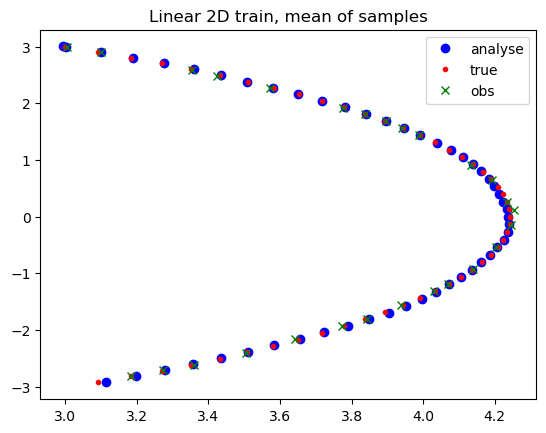

In [25]:
x_simu = torch.mean(torch.stack(x_lin2d_H_mod),axis=1).cpu().detach().numpy()

y_lin2d_H_mod_avg = [x for x in y_lin2d_H_mod if x is not None]

y_simu = torch.mean(torch.stack(y_lin2d_H_mod_avg),axis=1).cpu().detach().numpy()
ana = torch.mean(torch.stack(mus_lin2d_H_mod),axis=1).cpu().detach().numpy()

plt.plot(ana[:,0],ana[:,1],'o',color='blue')
plt.plot(x_simu[:,0],x_simu[:,1],'.',color='red',)
plt.plot(y_simu[:,0], y_simu[:,1],'x ', color='green')

plt.title('Linear 2D train, mean of samples')
plt.legend(['analyse', 'true', 'obs'])

plt.savefig(f'images/lin2d_train_mean_H_mod.png')

plt.show()

#### 3.4.3 Trajectory for test sample id

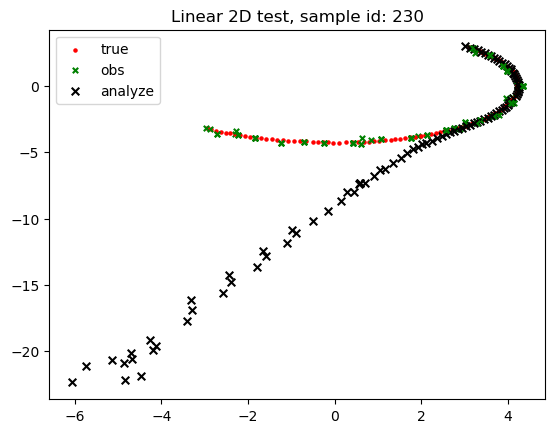

In [26]:
# np.random.seed(33)
id = np.random.randint(0, train_kwargs['b_size'])

plt.figure()

for t in range(test_kwargs['T']):
    xt_x, xt_y = x_test_lin2d_H_mod[t][id, 0].item(), x_test_lin2d_H_mod[t][id, 1].item()
    if y_test_lin2d_H_mod[t] is not None:
        yt_x, yt_y = y_test_lin2d_H_mod[t][id, 0].item(), y_test_lin2d_H_mod[t][id, 1].item()

    mu_x, mu_y = mus_test_lin2d_H_mod[t][id, 0].item(), mus_test_lin2d_H_mod[t][id, 1].item()

    plt.scatter(xt_x, xt_y, color='red', s=5)
    plt.scatter(yt_x, yt_y, color='green', s=15, marker='x')
    plt.scatter(mu_x, mu_y, color='k', s=30, marker='x')

plt.title(f'Linear 2D test, sample id: {id}')
plt.legend(['true', 'obs', 'analyze'])

plt.savefig(f'images/lin2d_test_{id}_H_mod.png')

plt.show()

#### 3.4.4 Trajectory for test mean sample

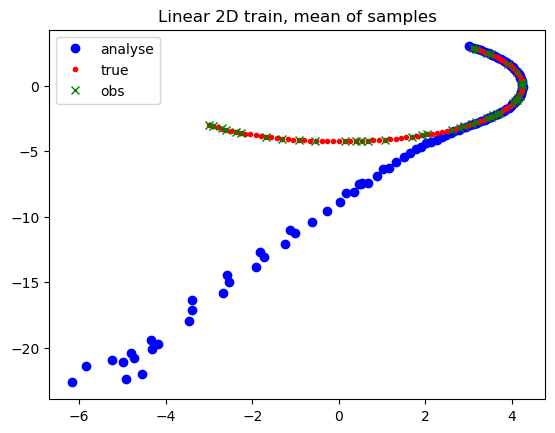

In [27]:
x_simu = torch.mean(torch.stack(x_test_lin2d_H_mod),axis=1).cpu().detach().numpy()

y_test_lin2d_H_mod_avg = [x for x in y_test_lin2d_H_mod if x is not None]

y_simu = torch.mean(torch.stack(y_test_lin2d_H_mod_avg),axis=1).cpu().detach().numpy()
ana = torch.mean(torch.stack(mus_test_lin2d_H_mod),axis=1).cpu().detach().numpy()

plt.plot(ana[:,0],ana[:,1],'o',color='blue')
plt.plot(x_simu[:,0],x_simu[:,1],'.',color='red',)
plt.plot(y_simu[:,0], y_simu[:,1],'x ', color='green')

plt.title('Linear 2D train, mean of samples')
plt.legend(['analyse', 'true', 'obs'])

plt.savefig(f'images/lin2d_test_mean_H_mod.png')

plt.show()

#### 3.4.5 Error

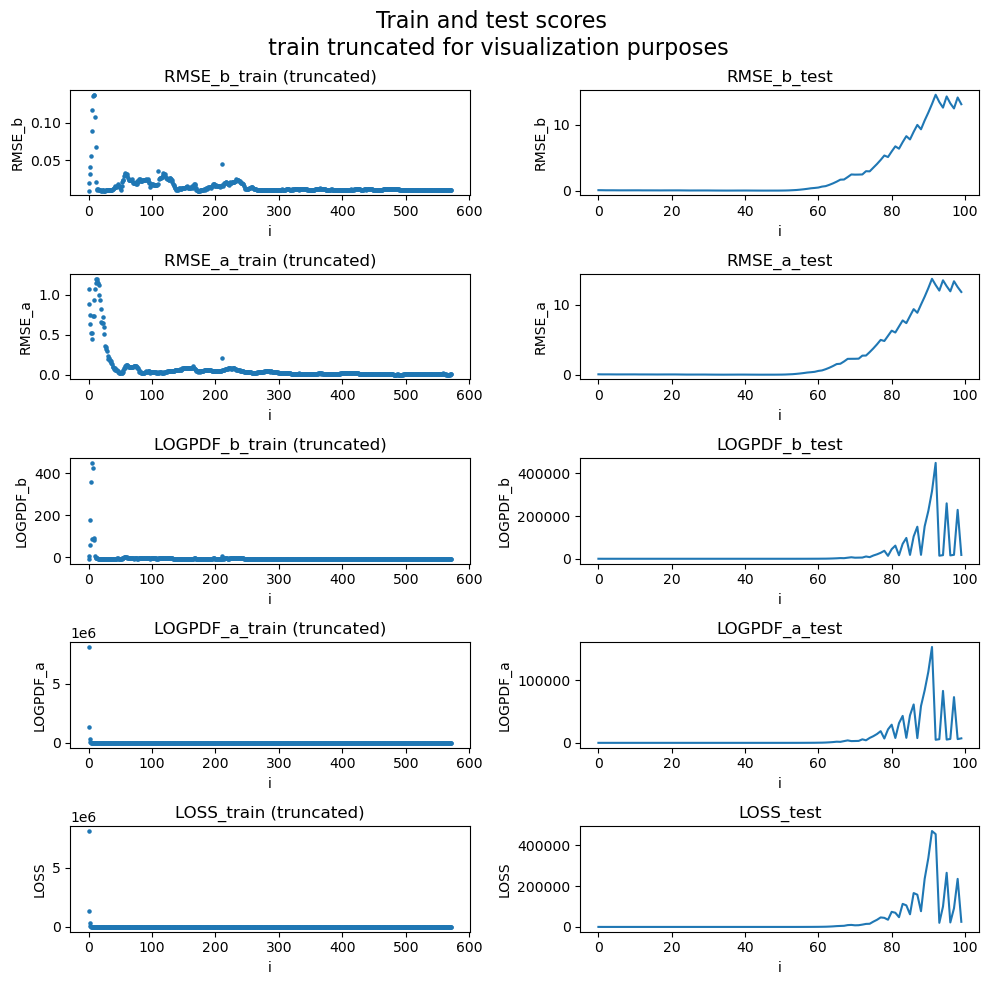

In [28]:
fig, axs = plt.subplots(len(scores_lin2d_H_mod.keys()), 2, figsize=(10, 10))

i = 0
for key_train, key_test in zip(scores_lin2d_H_mod.keys(), test_scores_lin2d_H_mod.keys()):
    data_train = scores_lin2d_H_mod[key_train][::100]
    data_test = test_scores_lin2d_H_mod[key_test]

    axs[i, 0].set_title(f'{key_train}_train (truncated)')
    axs[i, 0].scatter(np.arange(len(data_train)), data_train, s=5)
    axs[i, 0].set_xlabel('i')
    axs[i, 0].set_ylabel(key_train)

    axs[i, 1].set_title(f'{key_test}_test')
    axs[i, 1].plot(data_test)
    axs[i, 1].set_xlabel('i')
    axs[i, 1].set_ylabel(key_test)

    # if key_train in ['LOGPDF_a', 'LOGPDF_b', 'LOSS']:
    #     axs[i, 0].set_yscale('log')
        # axs[i, 1].set_yscale('log')
    
    i += 1

plt.suptitle('Train and test scores \n train truncated for visualization purposes', fontsize=16)
plt.tight_layout()

plt.savefig(f'images/lin2d_error_H_mod.png')

plt.show()

## 4. Lorenz Experiment with $H != Id$

In [2]:
from lorenz_H_exp import get_params

### 4.1 Unpacking dictionnary and setting up the experiment

In [3]:
experiment_params = get_params()

tensor_type = experiment_params['tensor_type']
seed = experiment_params['seed']
net_classname = experiment_params['net_classname']
net_kwargs = experiment_params['net_kwargs']
sigma0 = experiment_params['sigma0']
prop_kwargs = experiment_params['prop_kwargs']
obs_kwargs = experiment_params['obs_kwargs']
train_kwargs = experiment_params['train_kwargs']
test_kwargs = experiment_params['test_kwargs']
optimizer_classname = experiment_params['optimizer_classname']
optimizer_kwargs = experiment_params['optimizer_kwargs']
scheduler_classname = experiment_params['scheduler_classname']
scheduler_kwargs = experiment_params['scheduler_kwargs']
directory = experiment_params['directory']
full_observable = experiment_params['full_observable']

In [4]:
nameexp = 'lorenz_H_exp/'

### 4.2 Running the experiment

In [5]:
experiment(
    tensor_type=tensor_type,
    seed=seed,
    net_classname=net_classname,
    net_kwargs=net_kwargs,
    sigma0=sigma0,
    prop_kwargs=prop_kwargs,
    obs_kwargs=obs_kwargs,
    train_kwargs=train_kwargs,
    test_kwargs=test_kwargs,
    optimizer_classname=optimizer_classname,
    optimizer_kwargs=optimizer_kwargs,
    scheduler_classname=scheduler_classname,
    scheduler_kwargs=scheduler_kwargs,
    directory=directory,
    nameexp=nameexp,
    full_observable=full_observable,
    verbose=False
)

use gpu False
use tensor_type float
Training the network
 optimizer_classname torch.optim.Adam
 scheduler_classname torch.optim.lr_scheduler.ExponentialLR


Time  9999: 100%|██████████| 9999/9999 [50:45<00:00,  3.28it/s, observed=true, train_loss=100.34, lr=0.000100]   


### 4.3 Unpacking the experiment

In [6]:
# load saved files
optimizer_lorentz_H_mod = torch.load(f'{directory + nameexp}optimizer.pt')
scores_lorentz_H_mod = torch.load(f'{directory + nameexp}scores.pt')
test_scores_lorentz_H_mod = torch.load(f'{directory + nameexp}test_scores.pt')
x_lorentz_H_mod = torch.load(f'{directory + nameexp}x.pt')
y_lorentz_H_mod= torch.load(f'{directory + nameexp}y.pt')

x_test_lorentz_H_mod = torch.load(f'{directory + nameexp}x_test.pt')
y_test_lorentz_H_mod = torch.load(f'{directory + nameexp}y_test.pt')
list_qa_test_lorentz_H_mod = torch.load(f'{directory + nameexp}list_qa_test.pt')

mus_test_lorentz_H_mod = [mu.mean for mu in list_qa_test_lorentz_H_mod]

# load saved files
net = torch.load(f'{directory}{nameexp}net.pt')

print_scores(net.scores)

RMSE_b= 1.0488704442977905
RMSE_a= 0.7083849906921387
LOGPDF_b= 54.37812805175781
LOGPDF_a= 45.96513748168945
LOSS= 100.34326171875


### 4.4 Plotting

#### 4.4.1 Lorenz for a train sample id

In [7]:
indexes_none = []
indexes = []
y_lorenz_H_mod_avg = []

for i, x in enumerate(y_lorentz_H_mod):
    if x is not None:
        y_lorenz_H_mod_avg.append(x)
        indexes.append(i)
    else:
        a = torch.empty((1024, 40))
        a[:] = np.nan
        indexes_none.append(i)
        y_lorenz_H_mod_avg.append(a)

In [8]:
mask = np.empty((len(y_lorenz_H_mod_avg), y_lorenz_H_mod_avg[0].shape[0], y_lorenz_H_mod_avg[0].shape[1]))
mask[indexes_none, :, :] = 1
mask[indexes, :, :] = np.nan

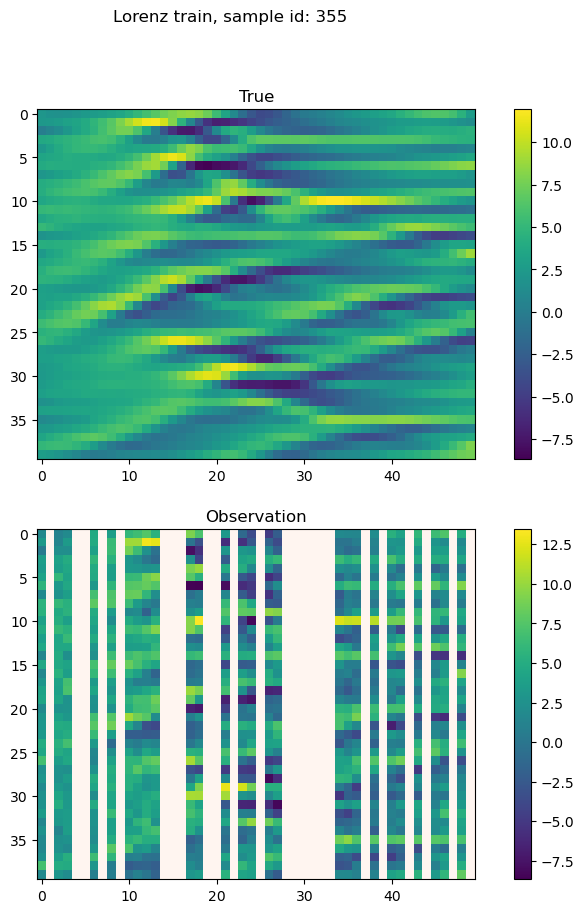

In [9]:
id = np.random.randint(0, train_kwargs['b_size'])

fig, axs = plt.subplots(2, figsize=(10, 10))

im = axs[0].imshow(torch.stack(x_lorentz_H_mod)[:50, id, :].T)
axs[0].set_title('True')


axs[1].imshow(mask[:50, id, :].T, 'Reds', interpolation='none')
im2 = axs[1].imshow(torch.stack(y_lorenz_H_mod_avg)[:50, id, :].T)
axs[1].set_title('Observation')


plt.colorbar(im)
plt.colorbar(im2)

plt.suptitle(f'Lorenz train, sample id: {id}')

plt.savefig(f'images/lorentz_train_{id}_H_mod.png')

plt.show()

#### 4.4.2 Lorenz for train mean sample

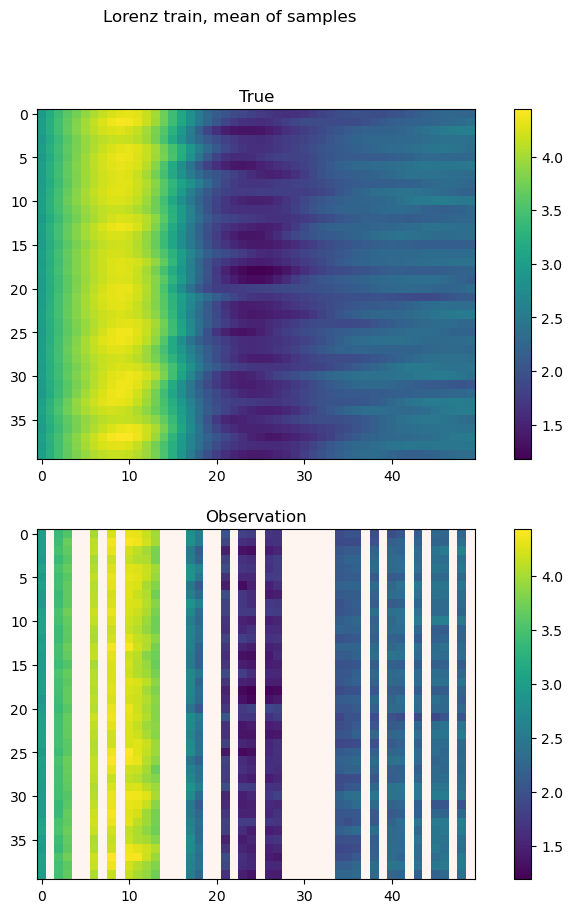

In [10]:
x_simu = torch.mean(torch.stack(x_lorentz_H_mod),axis=1).cpu().detach().numpy()
y_simu = torch.mean(torch.stack(y_lorenz_H_mod_avg),axis=1).cpu().detach().numpy()
mask_simu = mask[:, 0, :]

fig, axs = plt.subplots(2, figsize=(10, 10))

im = axs[0].imshow(x_simu[:50, :].T)
axs[0].set_title('True')

axs[1].imshow(mask_simu[:50, :].T, 'Reds', interpolation='none')
im2 = axs[1].imshow(y_simu[:50, :].T)
axs[1].set_title('Observation')

plt.colorbar(im)
plt.colorbar(im2)

plt.suptitle(f'Lorenz train, mean of samples')

plt.savefig(f'images/lorentz_train_mean_H_mod.png')

plt.show()

#### 4.4.3 Lorenz for a test sample id

In [11]:
indexes_none_test = []
y_test_lorentz_H_mod_avg = []
indexes_test = []


for i, x in enumerate(y_test_lorentz_H_mod):
    if x is not None:
        y_test_lorentz_H_mod_avg.append(x)
        indexes_test.append(i)
    else:
        a = torch.empty((1024, 40))
        a[:] = np.nan
        indexes_none_test.append(i)
        y_test_lorentz_H_mod_avg.append(a)

In [12]:
mask_test = np.empty((len(y_test_lorentz_H_mod), 1024, 40))
mask_test[indexes_none_test, :, :] = 1
mask_test[indexes_test, :, :] = np.nan

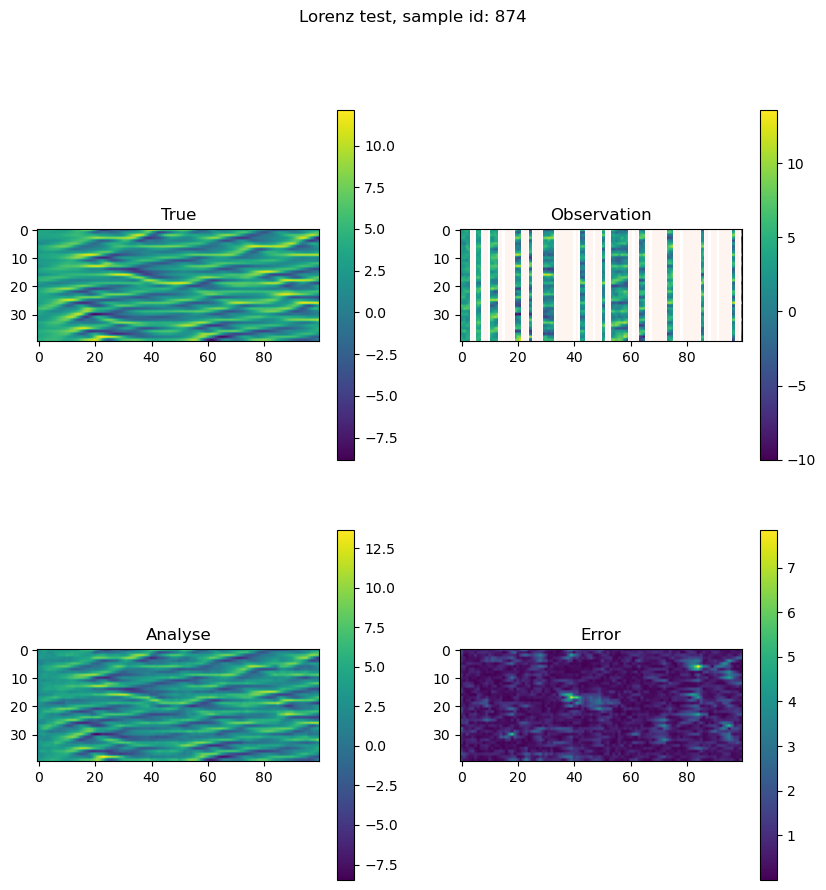

In [13]:
id = np.random.randint(0, test_kwargs['b_size'])

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

im = axs[0, 0].imshow(torch.stack(x_test_lorentz_H_mod)[:100, id, :].T)
axs[0, 0].set_title('True')

axs[0, 1].imshow(mask_test[:100, id, :].T, 'Reds', interpolation='none')
im2 = axs[0, 1].imshow(torch.stack(y_test_lorentz_H_mod_avg)[:100, id, :].T)
axs[0, 1].set_title('Observation')

im3 = axs[1, 0].imshow(torch.stack(mus_test_lorentz_H_mod)[:100, id, :].T)
axs[1, 0].set_title('Analyse')

im4 = axs[1, 1].imshow(torch.abs(torch.stack(x_test_lorentz_H_mod) - torch.stack(mus_test_lorentz_H_mod))[:100, id, :].T)
axs[1, 1].set_title('Error')

plt.colorbar(im)
plt.colorbar(im2)
plt.colorbar(im3)
plt.colorbar(im4)

plt.suptitle(f'Lorenz test, sample id: {id}')

plt.savefig(f'images/lorentz_test_{id}_H_mod.png')

plt.show()

#### 4.4.4 Lorenz for test mean sample

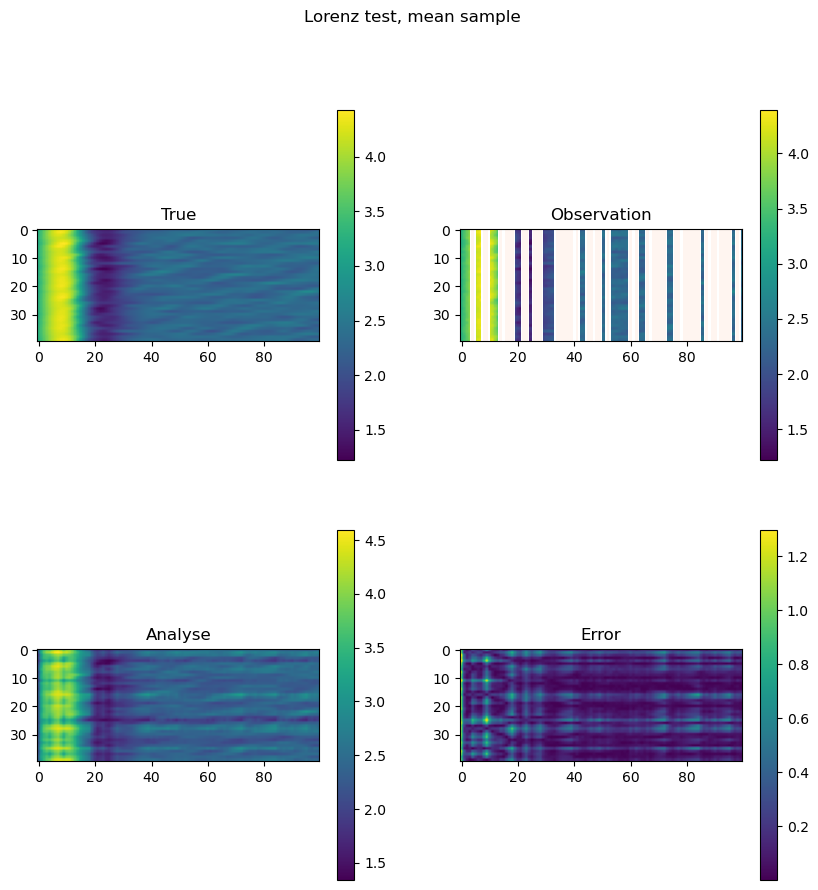

In [14]:
x_simu = torch.mean(torch.stack(x_test_lorentz_H_mod),axis=1).cpu().detach().numpy()
y_simu = torch.mean(torch.stack(y_test_lorentz_H_mod_avg),axis=1).cpu().detach().numpy()
mus_simu = torch.mean(torch.stack(mus_test_lorentz_H_mod), axis=1).detach().numpy()
mask_simu_test = mask_test[:, 0, :]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

im = axs[0, 0].imshow(x_simu[:100, :].T)
axs[0, 0].set_title('True')

axs[0, 1].imshow(mask_simu_test[:100, :].T, 'Reds', interpolation='none')
im2 = axs[0, 1].imshow(y_simu[:100, :].T)
axs[0, 1].set_title('Observation')

im3 = axs[1, 0].imshow(mus_simu[:100, :].T)
axs[1, 0].set_title('Analyse')

im4 = axs[1, 1].imshow(np.abs(x_simu - mus_simu)[:100, :].T)
axs[1, 1].set_title('Error')
# im = ax.imshow(torch.stack(x_test_lorentz)[:50, id, :].T)
# divider = make_axes_locatable(ax)

plt.colorbar(im)
plt.colorbar(im2)
plt.colorbar(im3)
plt.colorbar(im4)

plt.suptitle(f'Lorenz test, mean sample')

plt.savefig(f'images/lorentz_test_mean_H_mod.png')

plt.show()

#### 4.4.5 Error

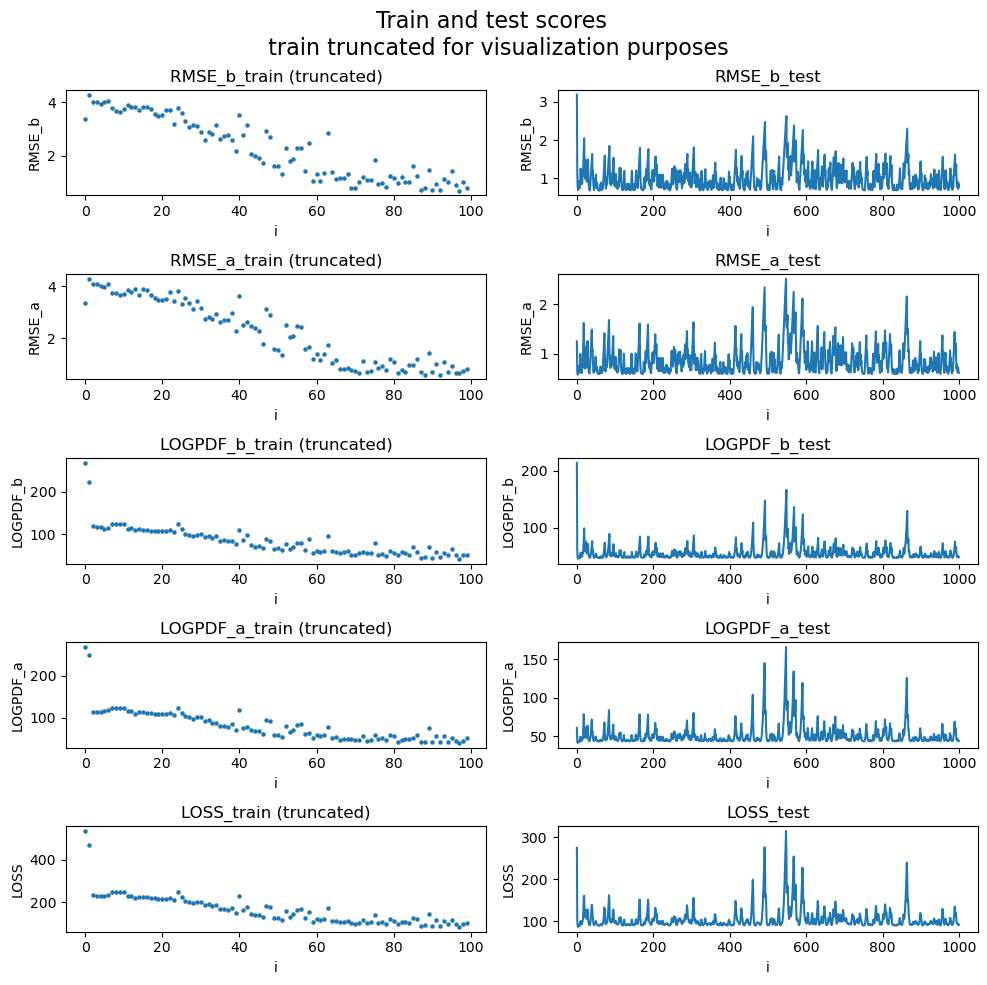

In [15]:
fig, axs = plt.subplots(len(scores_lorentz_H_mod.keys()), 2, figsize=(10, 10))

i = 0
for key_train, key_test in zip(scores_lorentz_H_mod.keys(), test_scores_lorentz_H_mod.keys()):
    data_train = scores_lorentz_H_mod[key_train][::100]
    data_test = test_scores_lorentz_H_mod[key_test]

    axs[i, 0].set_title(f'{key_train}_train (truncated)')
    axs[i, 0].scatter(np.arange(len(data_train)), data_train, s=5)
    axs[i, 0].set_xlabel('i')
    axs[i, 0].set_ylabel(key_train)

    axs[i, 1].set_title(f'{key_test}_test')
    axs[i, 1].plot(data_test)
    axs[i, 1].set_xlabel('i')
    axs[i, 1].set_ylabel(key_test)

    # if key_train in ['LOGPDF_a', 'LOGPDF_b', 'LOSS']:
    #     axs[i, 0].set_yscale('log')
        # axs[i, 1].set_yscale('log')
    
    i += 1

plt.suptitle('Train and test scores \n train truncated for visualization purposes', fontsize=16)
plt.tight_layout()

plt.savefig(f'images/lorentz_error_H_mod.png')

plt.show()